In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}


In [3]:
df = pd.DataFrame(data)

In [4]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [5]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [6]:
df.isnull().sum().sum()


5

In [7]:
df.isnull().sum().sum()/ len(df)


0.8333333333333334

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(missing_values= np.nan, strategy="mean")
imputer.fit(df[['weight']])

SimpleImputer()

In [10]:
imputer.statistics_

array([415.])

In [11]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [12]:
df['weight'] = imputer.transform(df[['weight']])


df.to_excel('df.xlsx')

In [13]:
imputer = SimpleImputer(missing_values= np.nan, strategy="most_frequent")

imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [14]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    0
bought    0
dtype: int64

In [15]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3    False
4    False
5    False
Name: weight, dtype: bool

In [16]:
df[pd.isnull(df['size'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,415.0,no


In [17]:
df[~pd.isnull(df['size'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [18]:
pd.notnull(df['weight'])

0    True
1    True
2    True
3    True
4    True
5    True
Name: weight, dtype: bool

In [19]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [20]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [21]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [22]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [23]:
df['size'].fillna(value='L', inplace=True)

In [24]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [25]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [26]:
df 

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [27]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


In [28]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

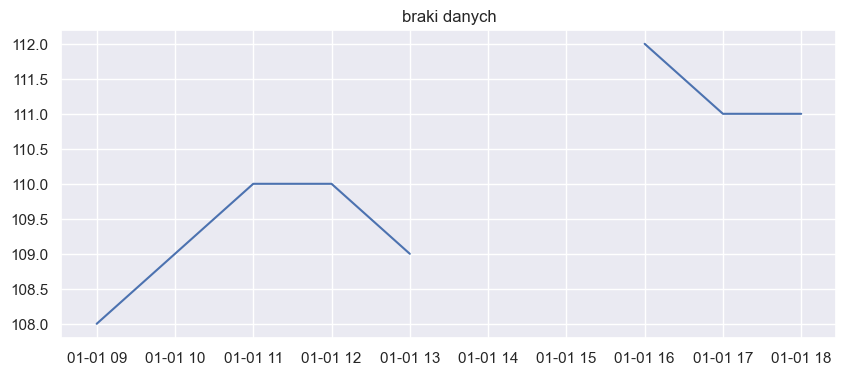

In [29]:
plt.figure(figsize=(10,4))
plt.title('braki danych')
_ = plt.plot(df.price)

In [30]:
import plotly_express as px
df_plotly = df.reset_index()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [31]:
px.line(df_plotly, 'index', 'price', width=600,height=400,
        title = "Szeregi czasowe - braki danych")

In [35]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600,height=400,
        title = "Szeregi czasowe - braki danych")

In [37]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600,height=400,
        title = "Szeregi czasowe - braki danych wstawione 0")

In [38]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600,height=400,
        title = "Szeregi czasowe - braki danych wstawione 0")

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600,height=400,
        title = "Szeregi czasowe - braki danych wstawione 0")

In [39]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600,height=400,
        title = "Szeregi czasowe - braki danych wstawione 0")


In [40]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600,height=400,
        title = "Szeregi czasowe - braki danych wstawione 0")


In [41]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600,height=400,
        title = "Szeregi czasowe - braki danych wstawione 0")
